In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy import signal

%matplotlib inline

font = {'family' : 'sans-serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)



In [35]:

file_loc = "C:/Users/MichaelDelph/Dropbox (Myomo Inc)/!Engineering/Project Files/Saturn/Designs/Behaviors/Position control/Hold Position Open Vel Control/"
sub_folder = "21AUG2020/"
sub_folder = "31AUG2020/"
file =  "ExpVelHold_HoldPos"
# file = "ExpVelHold_StepResponse"
# file = "FixedVelHold_HoldPos"
# file = "FixedVelHold_HoldPos2"
# file = "PropVelHold_HoldPos"
# file = "PropVelHold_StepResponse"
file ='HoldPosition_StateSwitchEval_Test2'


### 24AUG2020 ####
# file = "FixedVel_HoldPosition"
# file = "FixedVel_StepResponse"
ext = ".txt"
inputFile = open(file_loc + sub_folder + file + ext, "r")
outputFile = open(file_loc + sub_folder + file +"_output" + ext, "w")



import math
import re


# In[2]:


def fIsAllowedSpecificChar(string):
    charRe = re.compile(r'[^a-zA-Z0-9.]')
    string = charRe.search(string)
    return not bool(string)


# In[3]:


def fAdjustTime(sTimeStamp):
    x = sTimeStamp.split('.');
    fSecAdj = int(x[1]) * 10**-9;
    fReturnValue = float(x[0]) + fSecAdj;
    #print(fReturnValue)
    return(fReturnValue);


# In[11]:


def replace(string, char): 
    pattern = char + '{1,}'
    string = re.sub(pattern, char, string) 
    return string 


# In[5]:


def remove_non_ascii(text):
    return ''.join([i if (ord(i) < 128 and ord(i)>10) else ' ' for i in text])


# In[26]:


  
sArduinoValues=["nan","nan","nan"]
count = 0;
while True:   
    # Get next line from file 
    line = inputFile.readline() 
    count=count+1;
    # if line is empty 
    # end of file is reached 
    if not line: 
        break
    
    line = remove_non_ascii(line)
    line = line.replace(" ", ",");
    
    if ((line[0]!='$') and (line[0]!='#')):
        line = line.replace("Avg", "");
        line = line.replace("Motor", "");
        line = line.replace("Current", "");
        line = line.replace("HBridge", "");
        line = line.replace("Thermal", "");
        line = line.replace("Exterior", "");        
        line = line.replace("Motor", "");        
        line = line.replace("Thermal", "");        
        line = line.replace("\t", "");
        line = line.replace(" ", "");
        line = line.replace(":", "");
        line = replace(line,",")
   
        splitLine = line.split(',');
        splitLine.pop
        #print(splitLine)
        #print(line)
        #print(count)
        if (len(splitLine)==14):
            
            if (fIsAllowedSpecificChar(splitLine[0]) == True):
                splitLine[0] = str(fAdjustTime(splitLine[0]))
                s = ",";
                line=s.join(splitLine)
                #print(line.strip() + "," + sArduinoValues[0]+ "," + sArduinoValues[1]+ "," + sArduinoValues[2]);
                outputFile.write(line.strip() + sArduinoValues[0]+ "," + sArduinoValues[1]+ "," + sArduinoValues[2] + "\n")

        elif (len(splitLine)==5):
            #print(splitLine)
            s = ",";
            line=s.join(splitLine)
            if (splitLine[1]!="nan"): sArduinoValues[0] = str(splitLine[1]);
            if (splitLine[2]!="nan"): sArduinoValues[1] = str(splitLine[2]);
            if (splitLine[3]!="nan"): sArduinoValues[2] = str(splitLine[3].strip()); 
                
  
inputFile.close() 
outputFile.close()


In [37]:
df_raw = file_loc + sub_folder +file +"_output.csv"
# df_raw = file_loc + sub_folder +file +".csv"


df_raw = pd.read_csv(df_raw, header=0, dtype=np.float64)

time = df_raw['time'].values
time = time - time[0]
time = time/60


tricep_emg = df_raw['tricep'].values
bicep_emg = df_raw['bicep'].values
effort = df_raw['effort'].values
threshold = df_raw['thres'].values
effort_delta = df_raw['delta'].values
deadband = df_raw['deadband'].values

SP = df_raw['SP'].values
pos = df_raw['input'].values

state = df_raw['state'].values

duty = df_raw['PWM'].values

mot_temp = df_raw['mot_temp'].values
bat_current = df_raw['bat_current'].values
# motor_current = df_raw['mot_current'].values
# hbridge_temp = df_raw['hbridge'].values
# hbridge_temp = (hbridge_temp * 1.8) + 32

# print(time)



[ 0.    0.    0.   ... 30.05 30.05 30.05]


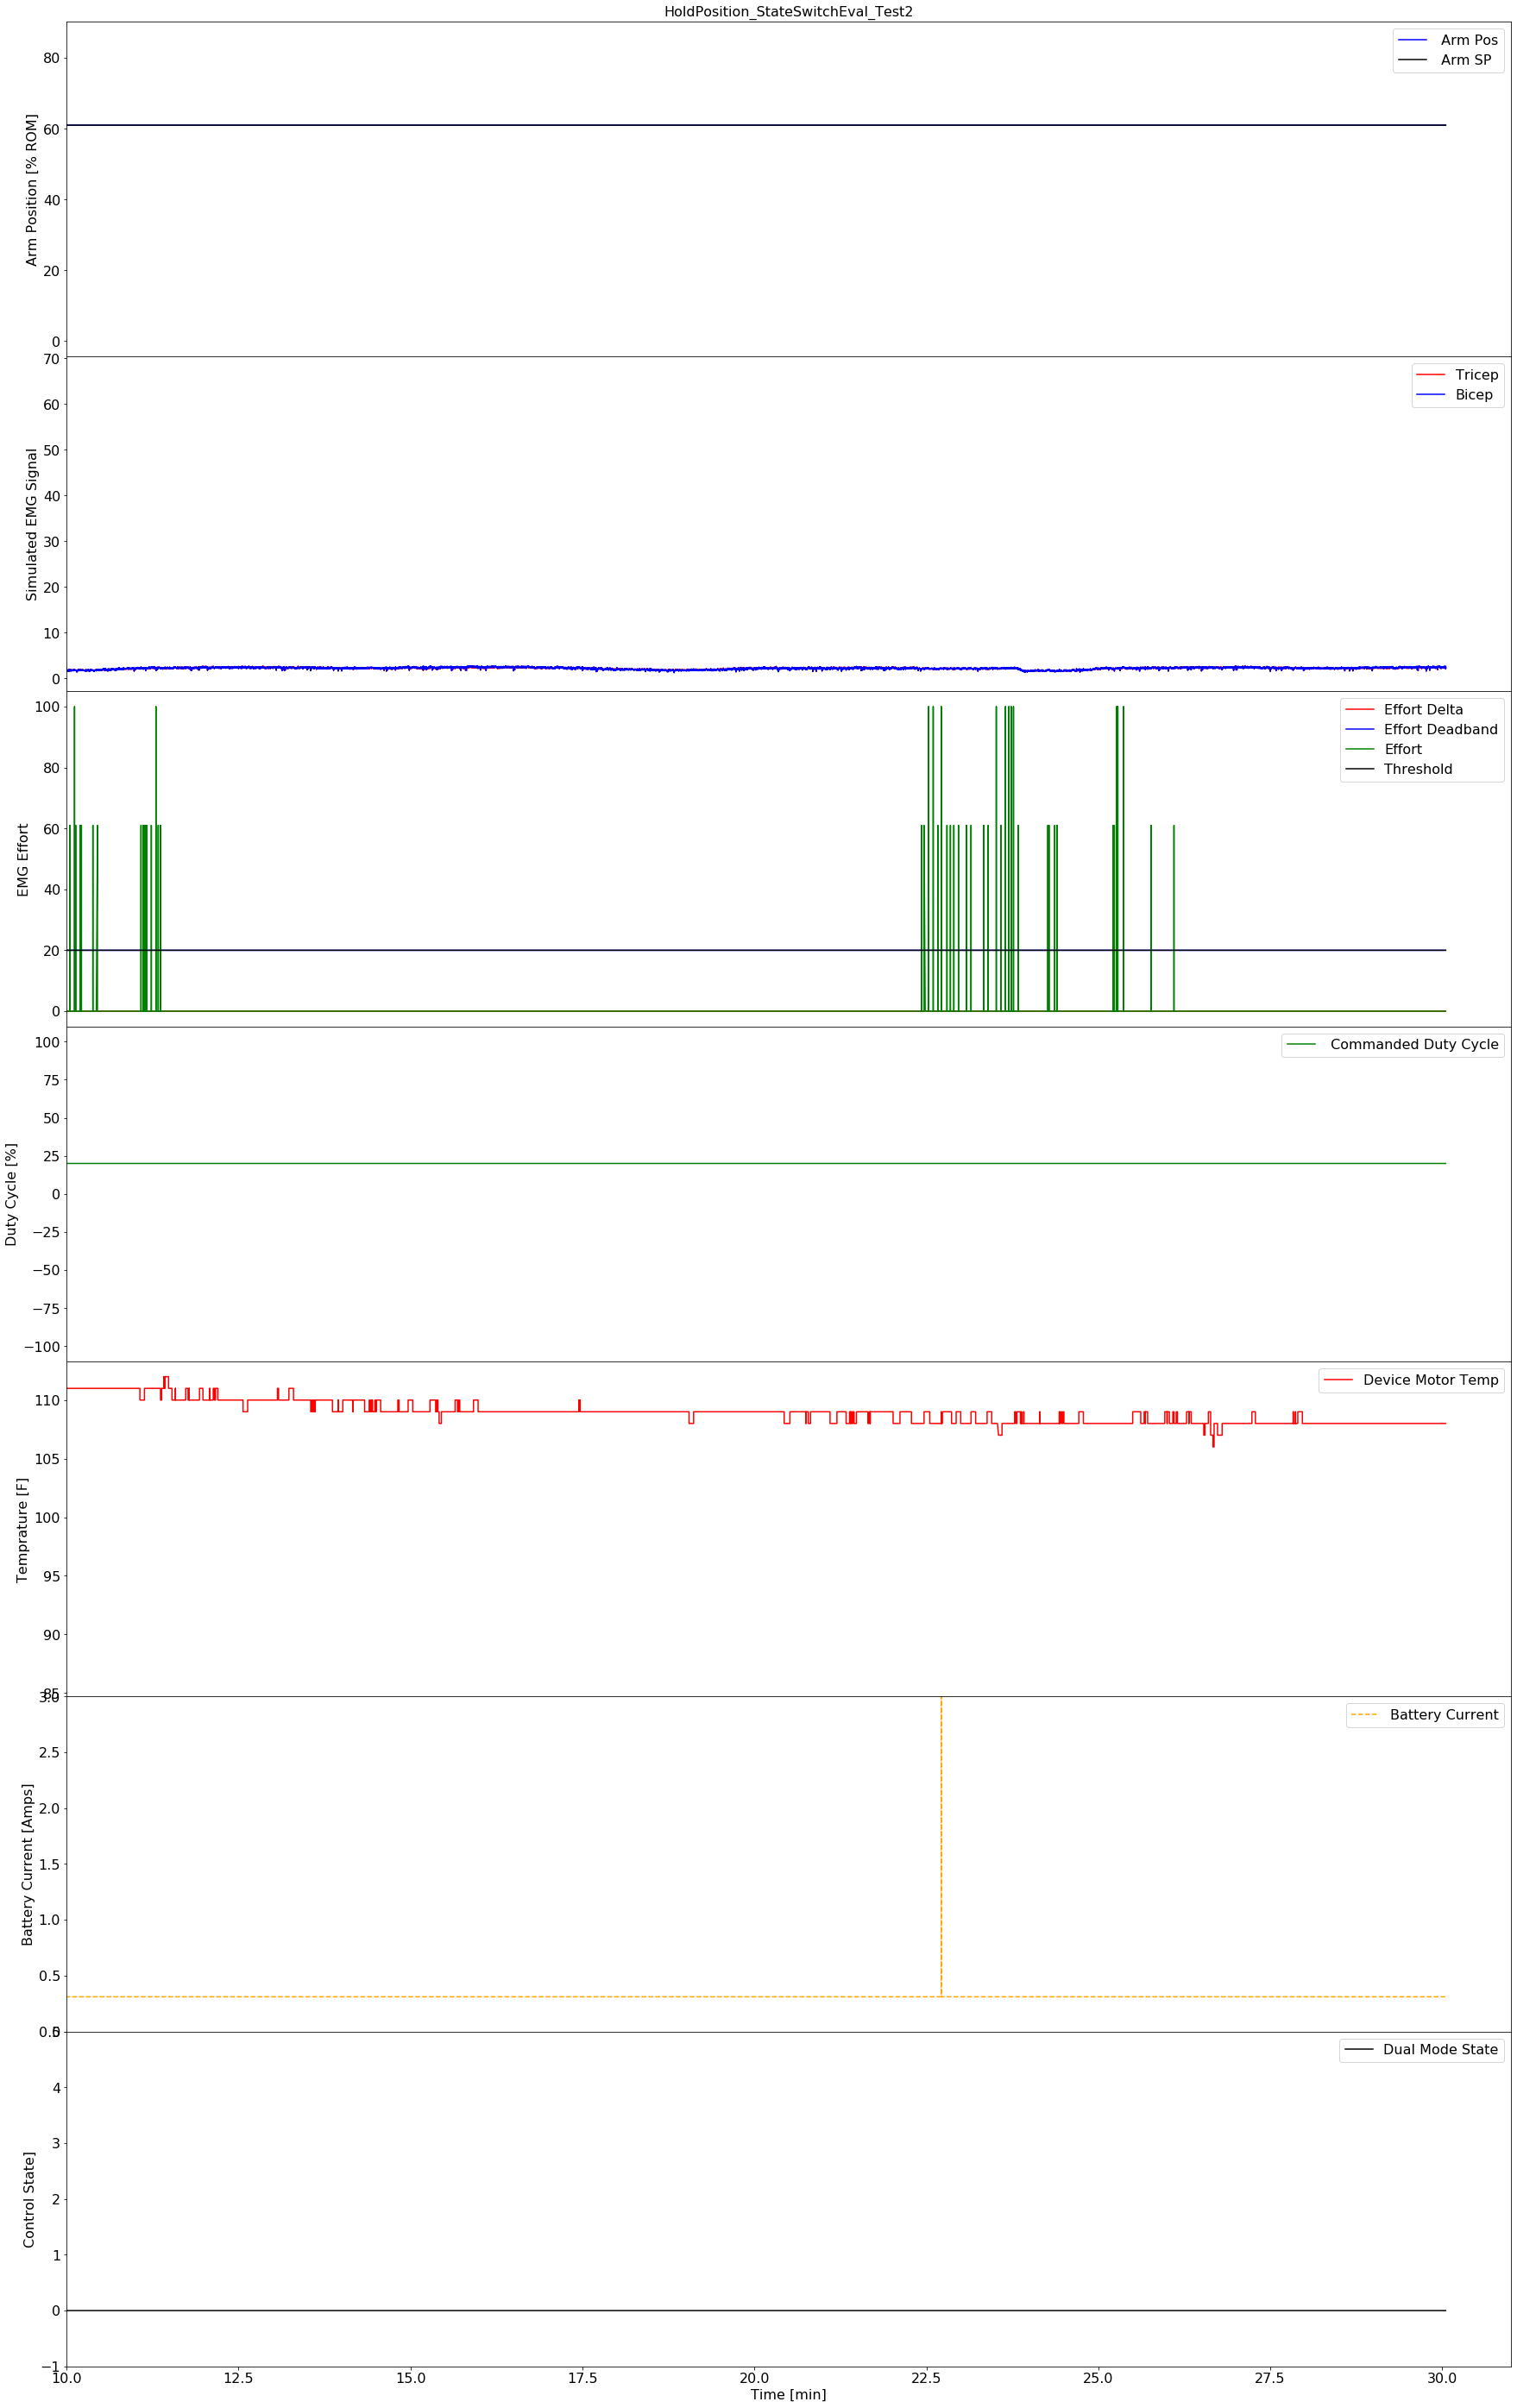

In [53]:
fig, axs = plt.subplots(7, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.set_figheight(50)
fig.set_figwidth(30)



axs[0].plot(time, pos , color = 'b', label = ' Arm Pos')
axs[0].plot(time, SP , color = 'k', label = ' Arm SP')
axs[0].set_ylabel('Arm Position [% ROM]')
axs[0].set_title(file, fontsize=16)
# axs[0].set_ylim(0, 70)
# axs[0].set_xlim(2.1,2.15)
axs[0].legend()

axs[1].plot(time, tricep_emg , color = 'r', label = 'Tricep')
axs[1].plot(time, bicep_emg, color = 'b', label = 'Bicep')
# axs[1].plot(time, effort, color = 'g', label = 'Effort')
# axs[1].plot(time, threshold, color = 'k', label = 'Threshold')
axs[1].set_ylabel('Simulated EMG Signal')
# axs[1].set_title(device_file_name, fontsize=16)
# axs[0].set_ylim(0, 70)
# axs[0].set_xlim(2.1,2.15)
axs[1].legend()

axs[2].plot(time, effort_delta , color = 'r', label = 'Effort Delta')
axs[2].plot(time, deadband, color = 'b', label = 'Effort Deadband')
axs[2].plot(time, effort, color = 'g', label = 'Effort')
axs[2].plot(time, threshold,  '-k', label = 'Threshold')
axs[2].set_ylabel('EMG Effort')
# axs[1].set_title(device_file_name, fontsize=16)
# axs[0].set_ylim(0, 70)
# axs[0].set_xlim(2.1,2.15)
axs[2].legend()

axs[3].plot(time,duty , color = 'g', label = ' Commanded Duty Cycle')
axs[3].set_ylabel('Duty Cycle [%]')
# axs[1].set_title(device_file_name, fontsize=16)
axs[3].set_ylim(-110, 110)
# axs[0].set_xlim(2.1,2.15)
axs[3].legend()

axs[4].plot(time, mot_temp, color = 'r',label = 'Device Motor Temp' )
# axs[3].plot(time,hbridge_temp, color = 'maroon', label = 'H-Bridge Temp' )
# axs[2].plot(t_current,Motor_temp, color = 'coral', label = 'External Motor Temp')
# axs[3].plot(time,highLim_bar, '--r')
axs[4].set_ylabel('Temprature [F]')
# axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
# axs[1].set_ylim(0, 1)
axs[4].legend()


# axs[4].plot(time, motor_current, color = 'gold', label = ' Motor Current')
axs[5].plot(time,bat_current, '--', color =  'orange', label = 'Battery Current')
# axs[4].set_xlabel('Time [min]')
axs[5].set_ylabel('Battery Current [Amps]')
# axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[5].set_ylim(0, 3)
axs[5].legend()


axs[6].plot(time, state, color = 'k', label = 'Dual Mode State')
axs[6].set_xlabel('Time [min]')
axs[6].set_ylabel('Control State]')
# axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[6].set_ylim(-1, 5)
axs[6].set_xlim(10,31)
axs[6].legend()